### Prepare the Data


In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("../datasets/raw_analyst_ratings.csv")

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Extract relevant time features
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour
df["day_of_week"] = df["date"].dt.day_name()

### Analyze Publication Frequency Over Time


Monthly Frequency


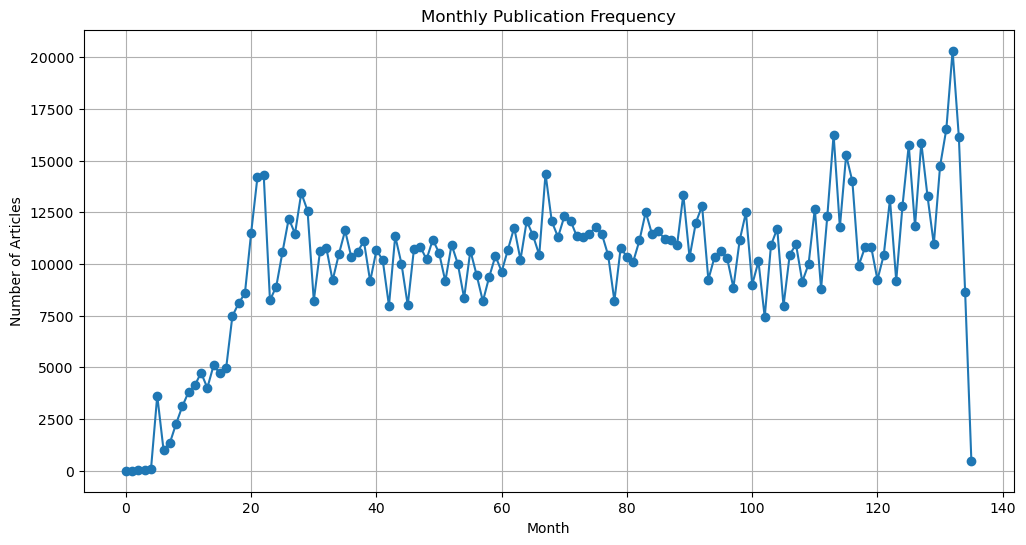

In [7]:
# Group by year and month, then count articles
monthly_counts = df.groupby(["year", "month"]).size().reset_index(name="count")

# Plot monthly publication frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts["count"], marker="o")
plt.title("Monthly Publication Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()

Daily Frequency


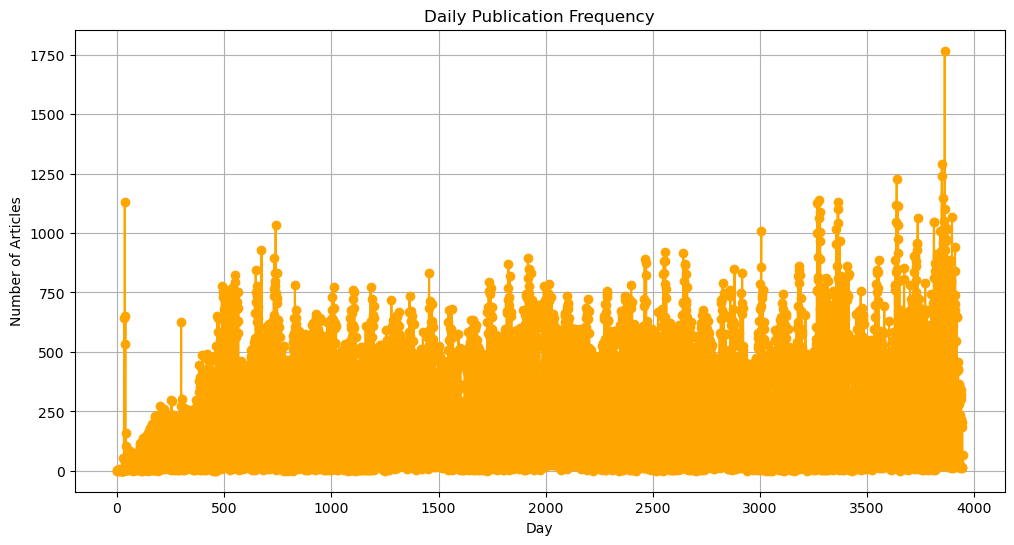

In [9]:
# Group by year, month, and day, then count articles
daily_counts = df.groupby(["year", "month", "day"]).size().reset_index(name="count")

# Plot daily publication frequency
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts["count"], marker="o", color="orange")
plt.title("Daily Publication Frequency")
plt.xlabel("Day")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()

Hourly Frequency


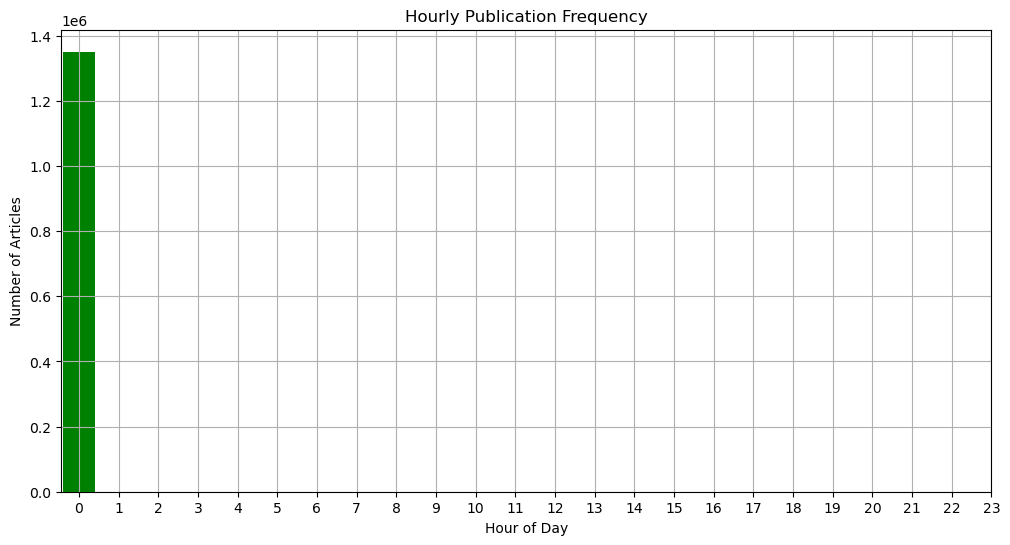

In [11]:
# Group by hour of the day, then count articles
hourly_counts = df.groupby("hour").size().reset_index(name="count")

# Plot hourly publication frequency
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts["hour"], hourly_counts["count"], color="green")
plt.title("Hourly Publication Frequency")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Articles")
plt.xticks(range(24))
plt.grid(True)
plt.show()

Market Events


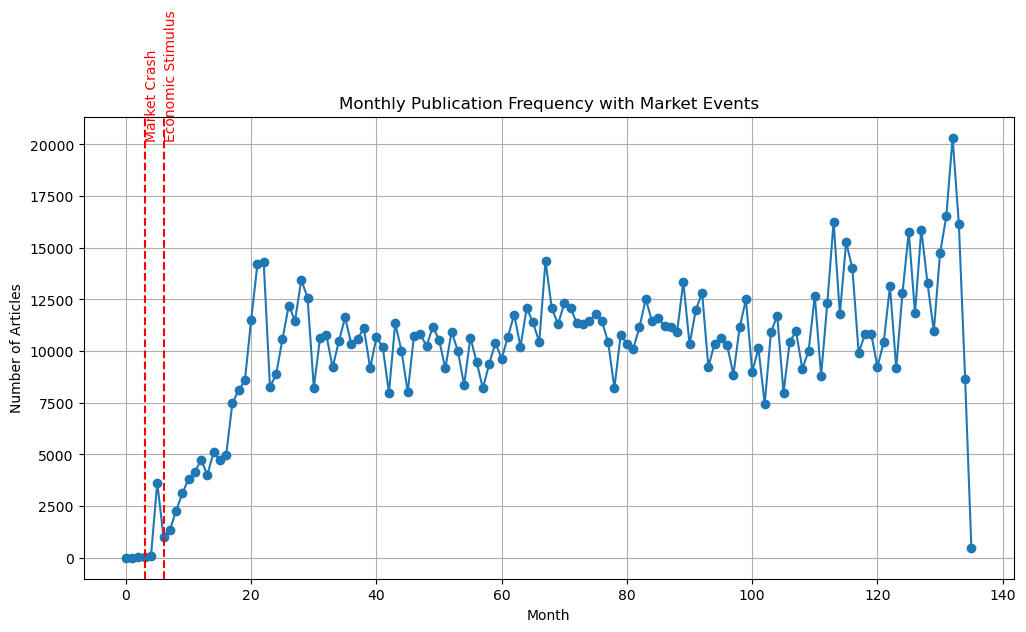

In [15]:
# Example of adding event annotations to the monthly frequency plot
events = {
    '2020-03-01': 'Market Crash',
    '2020-06-01': 'Economic Stimulus'
}

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts['count'], marker='o')
for date, event in events.items():
    plt.axvline(x=pd.to_datetime(date).month, color='red', linestyle='--')
    plt.text(pd.to_datetime(date).month, max(monthly_counts['count']), event, rotation=90, color='red')
plt.title('Monthly Publication Frequency with Market Events')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()
